# Clustering

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF, LatentDirichletAllocation
from collections import Counter

sns.set_theme()

To start, let's pull in the data from data_exploration.ipynb

In [2]:
comments = pd.read_pickle("../private/top_100_processed.pkl")

Now vectorize it so we can cluster it!

In [3]:
vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.5, stop_words="english")
comments_tfidf = vectorizer.fit_transform(comments.text)

Now to try to see if there are any clusters...

In [4]:
svd_model = TruncatedSVD(n_components=2)            # slim down to 2 dimensions!
comments_svd = svd_model.fit_transform(comments_tfidf)

In [5]:
comments_svd.shape

(118299, 2)

<Axes: >

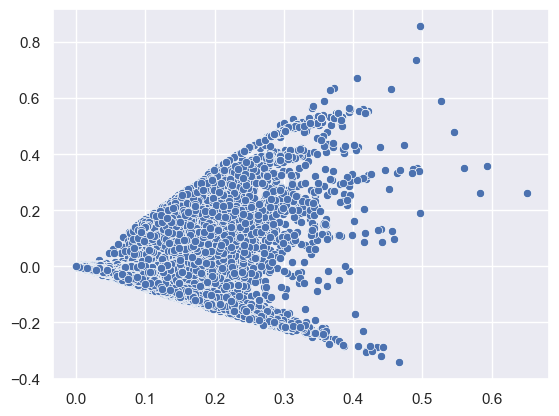

In [6]:
sns.scatterplot(x=comments_svd[:, 0], y=comments_svd[:, 1])

Hmm, no obvious clusters here, but a wide spread! Maybe just a decently high number?

In [7]:
# Slightly modified from activity 7
def display_topics(model, feature_names, num_top_words):
    for i, topic in enumerate(model.components_):
        print(f"Topic {i}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))


I'm going to try both NML and LDA to see which one has better looking clusters.

In [8]:
num_topics = 24

nmf_model = NMF(n_components=num_topics, random_state=0, l1_ratio=0.5, init="nndsvd").fit(comments_tfidf)

display_topics(nmf_model, vectorizer.get_feature_names_out(), 10)

Topic 0:
people time day way got make going right think work
Topic 1:
love absolutely guy fucking omg cats idea style cat creative
Topic 2:
beautiful absolutely work picture thank photo sharing tattoo cat art
Topic 3:
good job boy dad luck really pretty news damn looking
Topic 4:
looks delicious dog damn happy incredible pretty painting straight gorgeous
Topic 5:
amazing work absolutely job look thank sharing omg piece tattoo
Topic 6:
cute cat omg little dog adorable aww super awww look
Topic 7:
great job work idea picture shot look dad news photo
Topic 8:
wow gorgeous really incredible stunning impressive tattoo absolutely thanks job
Topic 9:
awesome job dude fucking work thanks dad picture pretty sharing
Topic 10:
nice work job really shot art tattoo op guy touch
Topic 11:
just say wanted doesn new use maybe ll little watching
Topic 12:
https com imgur jpg www reddit youtu youtube watch png
Topic 13:
cool really pretty super damn thats dad thanks actually tattoo
Topic 14:
did job dog

In [9]:
lda_model = LatentDirichletAllocation(n_components=num_topics, max_iter=5, learning_method='online',
                                      learning_offset=50.,random_state=0).fit(comments_tfidf)

display_topics(lda_model, vectorizer.get_feature_names_out(), 10)

Topic 0:
fuck bro did perfect hank idea kid eat come wrong
Topic 1:
cool incredible tattoo tell gonna sun delicious bless mom head
Topic 2:
wow fucking happy guy looking love just protect handsome impressed
Topic 3:
gif giphy legend rhino fuckin downsized tomorrow dumb trick happens
Topic 4:
https stunning com finally live youtu john wonder hug animals
Topic 5:
joke guys praise skin camera gotta black cutie dick earth
Topic 6:
lol oh got vibes super nintendo rainbow fart 100 tinder
Topic 7:
savevideo wholesome precious 10 af dead 11 btc doggo savevideobot
Topic 8:
dog reddit boy interesting use needs welcome birthday piece hard
Topic 9:
nice damn dude sad king song cake end mr sub
Topic 10:
looks like look need know video don does hilarious good
Topic 11:
god little thats girl asparagus anime ok awww mean bit
Topic 12:
fantastic turtle hate poor sorry moon suit hi knew clearly
Topic 13:
great thank op job thanks sharing doing big ll excellent
Topic 14:
adorable really hope funny wtf sm

Of these two, the results from LDA seem slightly more interesting to me, so I'll take a closer look at it, what's the distribution of subreddit for each of these topics?

In [10]:
# modified from activity 7
def display_topics2(H, W, feature_names, docs, num_top_words, num_top_docs):
    for topic_idx, topic in enumerate(H):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))
        print('--------')
        top_doc_indices = np.argsort( W[:,topic_idx] )[::-1][0:num_top_docs]

        # build list for frequency distribution
        subs = Counter()
        for doc_index in top_doc_indices:
            subs.update([docs.loc[doc_index].subreddit])
        print(subs.most_common(5))
        print('----------------------------------------------')

lda_W = lda_model.transform(comments_tfidf)    # topics-to-documents matrix
lda_H = lda_model.components_           # word-to-topics matrix
feat_names = vectorizer.get_feature_names_out()

# print top words, top-1 document from each topic
display_topics2(lda_H, lda_W, feat_names, comments, 10, 1000)

Topic 0:
fuck bro did perfect hank idea kid eat come wrong
--------
[('gaming', 42), ('wholesomememes', 35), ('food', 33), ('FoodPorn', 30), ('AnimalsBeingDerps', 28)]
----------------------------------------------
Topic 1:
cool incredible tattoo tell gonna sun delicious bless mom head
--------
[('tattoos', 61), ('food', 42), ('gardening', 32), ('FoodPorn', 32), ('Minecraft', 32)]
----------------------------------------------
Topic 2:
wow fucking happy guy looking love just protect handsome impressed
--------
[('itookapicture', 48), ('food', 37), ('tattoos', 36), ('rarepuppers', 34), ('Awwducational', 29)]
----------------------------------------------
Topic 3:
gif giphy legend rhino fuckin downsized tomorrow dumb trick happens
--------
[('DIY', 43), ('memes', 41), ('tifu', 40), ('cats', 38), ('aww', 35)]
----------------------------------------------
Topic 4:
https stunning com finally live youtu john wonder hug animals
--------
[('photoshopbattles', 52), ('itookapicture', 44), ('tat